In [1]:
'''
@author: Nikesh
Dataset: Graduate Admissions, From Kaggle, The dataset is owned by Mohan S Acharya. 
'''

from __future__ import absolute_import, division, print_function
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
#Lets load the data
df = pd.read_csv('AdmissionDataset/Admission_Predict.csv')
df_pred_data = df.copy()

In [3]:
df_pred_data.pop('Serial No.')
df_pred_data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
df_pred_data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
#splitting dataset for training and testing 
train_dataset = df_pred_data.sample(frac = 0.8, random_state = 0)
test_dataset = df_pred_data.drop(train_dataset.index)

In [6]:
train_dataset.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
279,304,102,2,3.0,4.0,8.73,0,0.67
227,312,110,2,3.5,3.0,8.53,0,0.64
148,339,116,4,4.0,3.5,9.80,1,0.96
143,340,120,4,4.5,4.0,9.92,1,0.97
180,300,104,3,3.5,3.0,8.16,0,0.71


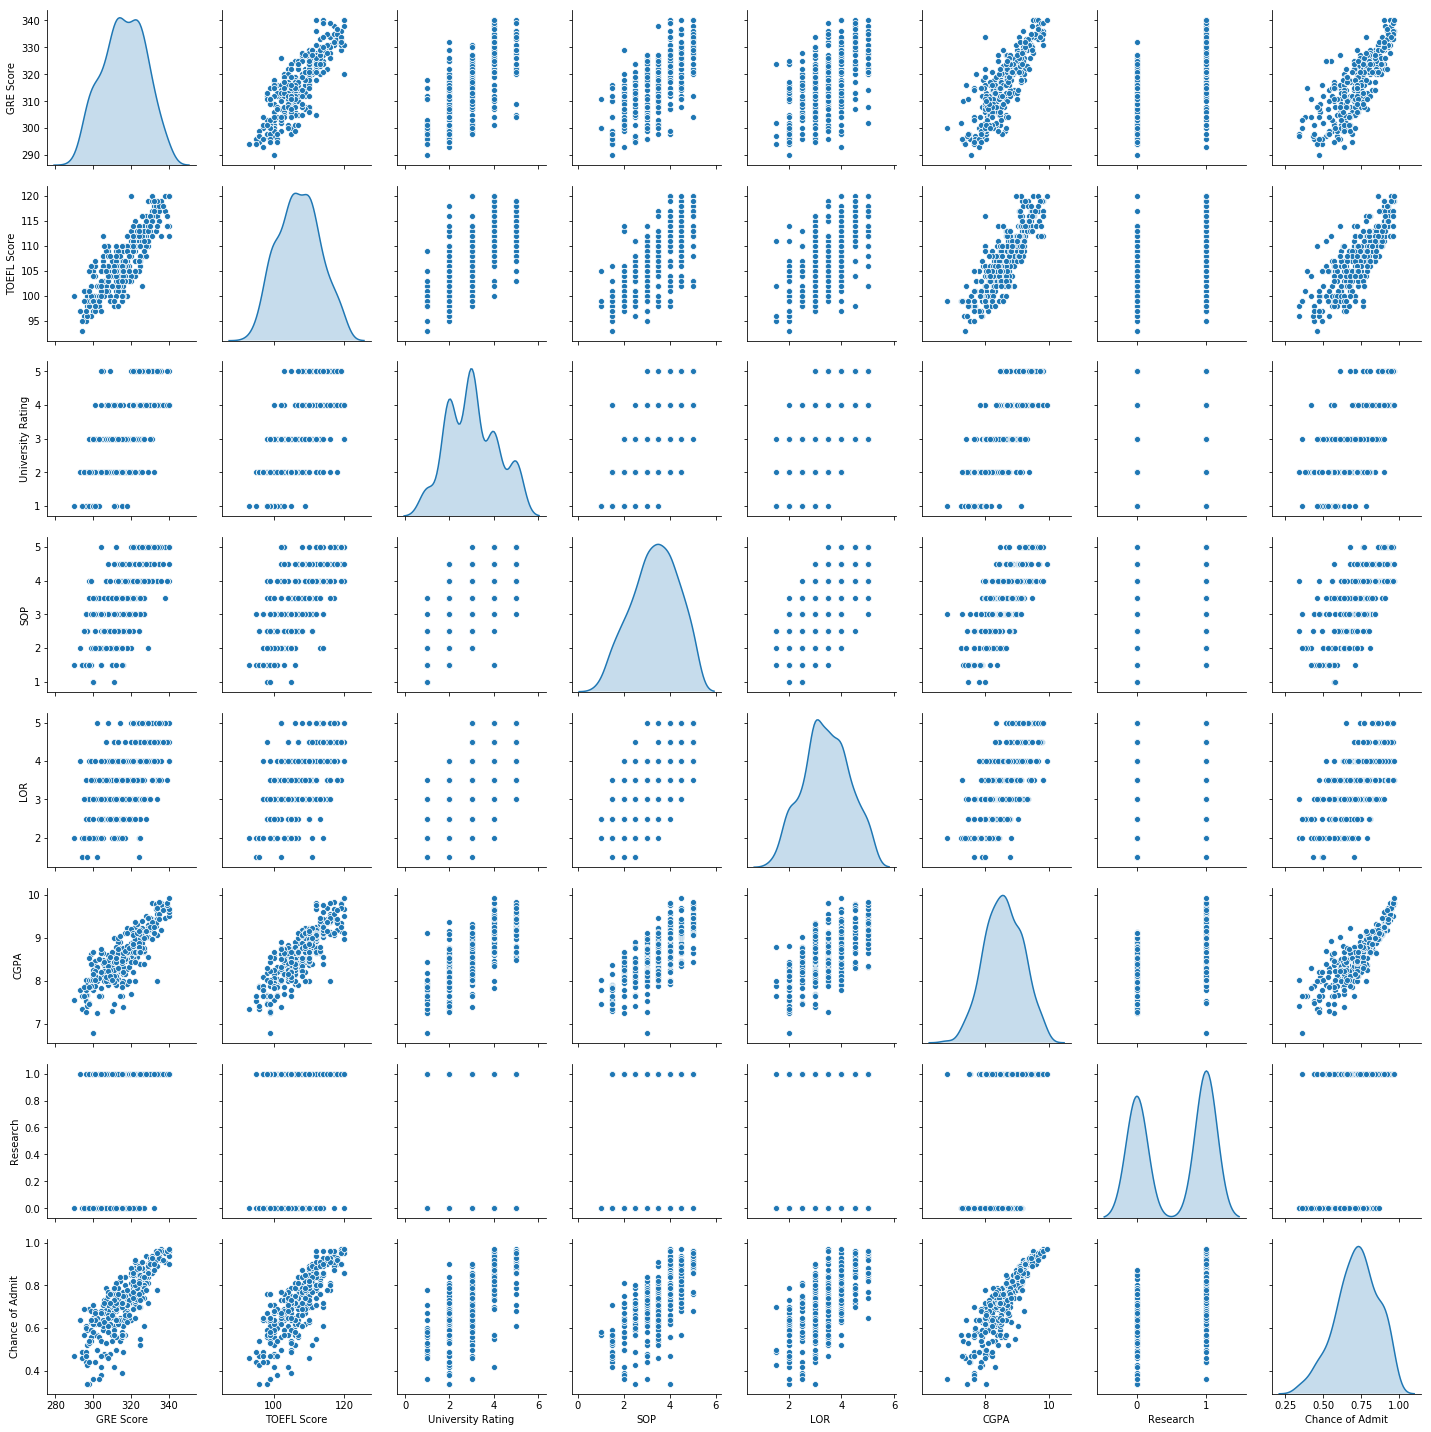

In [7]:
sns.pairplot(train_dataset, diag_kind="kde", palette = 'husl')

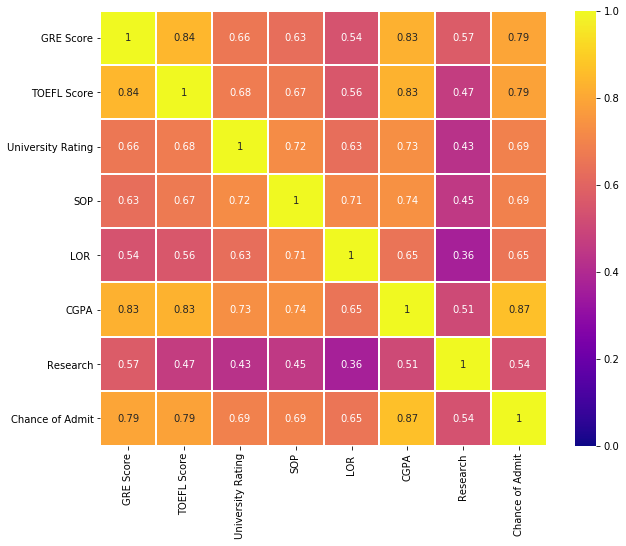

In [8]:
#lets look into the correlation
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(train_dataset.corr(), ax = ax, annot = True, linewidths=1, cmap='plasma', vmin = 0, vmax=1)
plt.show()

In [9]:
#Lets look into the stats of the dataset
#train_stats = train_dataset.describe()
#train_dataset.corr()['Chance of Admit'].round(1)

In [12]:
train_stats = train_dataset.describe()
train_stats

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,316.456250,107.290625,3.053125,3.373438,3.431250,8.586406,0.546875,0.722125
std,11.260298,5.903607,1.108668,0.988372,0.856448,0.580847,0.498578,0.139031
min,290.000000,93.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.175000,0.000000,0.640000
50%,316.500000,107.000000,3.000000,3.500000,3.500000,8.565000,1.000000,0.730000
75%,325.000000,111.000000,4.000000,4.000000,4.000000,9.042500,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [13]:
train_stats.pop("Chance of Admit")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
GRE Score,320.0,316.456250,11.260298,290.0,308.000,316.500,325.0000,340.00
TOEFL Score,320.0,107.290625,5.903607,93.0,103.000,107.000,111.0000,120.00
University Rating,320.0,3.053125,1.108668,1.0,2.000,3.000,4.0000,5.00
SOP,320.0,3.373438,0.988372,1.0,2.500,3.500,4.0000,5.00
LOR,320.0,3.431250,0.856448,1.5,3.000,3.500,4.0000,5.00
CGPA,320.0,8.586406,0.580847,6.8,8.175,8.565,9.0425,9.92
Research,320.0,0.546875,0.498578,0.0,0.000,1.000,1.0000,1.00


# Extracting training and testing labels and Normalizing dataset

In [14]:
#Train and test labels
train_labels = train_dataset.pop("Chance of Admit")
test_labels = test_dataset.pop("Chance of Admit")

In [17]:
#Lets normalize the data

def norm(x):
    return (x - train_stats['mean'])/(train_stats['std'])
normed_train_dataset = norm(train_dataset)
normed_test_dataset = norm(test_dataset)

In [18]:
normed_train_dataset.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
279,-1.106210,-0.896168,-0.949902,-0.377831,0.664080,0.247215,-1.096871
227,-0.395749,0.458936,-0.949902,0.128052,-0.503533,-0.097110,-1.096871
148,2.002056,1.475263,0.854066,0.633934,0.080273,2.089353,0.908836
143,2.090864,2.152815,0.854066,1.139817,0.664080,2.295948,0.908836
180,-1.461440,-0.557392,-0.047918,0.128052,-0.503533,-0.734111,-1.096871


# Building the regression model with keras

In [19]:
def build_model():
    #using keras sequential model
    model = keras.Sequential([
        keras.layers.Dense(64,activation = tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        keras.layers.Dense(64,activation = tf.nn.relu),
        keras.layers.Dense(1)
    ])
    Optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss = 'mse', optimizer = Optimizer,metrics = ['mae','mse'])
    
    return model

In [24]:
model = build_model()

In [25]:
#lets look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


# Lets try out the model, take 10 samples as a batch

In [26]:
example_batch = normed_train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.20884155],
       [-0.06297517],
       [ 0.01575965],
       [ 0.05391024],
       [-0.06687817],
       [ 0.01027887],
       [ 0.03586468],
       [-0.16595492],
       [-0.35649008],
       [-0.15154797]], dtype=float32)

# Now, we can train the model for 200 epochs, we will evaluate at every 50 samples

In [27]:
#Display training progress by printing a single dot for each completed epoch
class PrintLine(keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs):
        if epoch % 50 == 0:print('\nEpoch {} finished \n'.format(epoch))
        print('-',end='')
            
EPOCHS = 200

history = model.fit(
    normed_train_dataset, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose=0,
    callbacks = [PrintLine()]
)


Epoch 0 finished 

--------------------------------------------------
Epoch 50 finished 

--------------------------------------------------
Epoch 100 finished 

--------------------------------------------------
Epoch 150 finished 

--------------------------------------------------

# Lets visualise the training progress

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
195,0.008515,0.067214,0.008515,0.001308,0.026056,0.001308,195
196,0.009213,0.075090,0.009213,0.001437,0.030812,0.001437,196
197,0.008936,0.068392,0.008936,0.000911,0.023849,0.000911,197
198,0.010703,0.082340,0.010703,0.001356,0.026769,0.001356,198
199,0.007931,0.065121,0.007931,0.000876,0.021197,0.000876,199


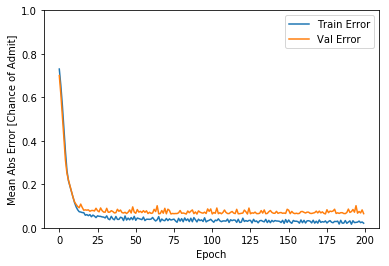

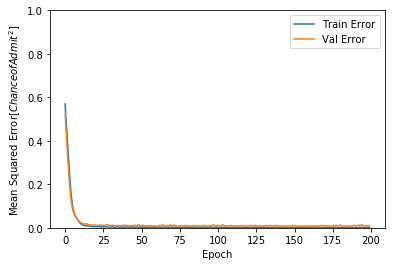

In [30]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Chance of Admit]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,1])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error[$Chance of Admit^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,1])
    
    plt.show()
    
plot_history(history)